In [1]:
import numpy as np
import pandas as pd

In [2]:
input_path = "input_data_EDA3.csv"
input_df = pd.read_csv(input_path)
input_df.head(10)

,most_altitude,most_location_provider,most_long_1,most_lat_1,Frequency_gps_points,loan_outcome,age,cash_incoming_30days
0,Low,fused,A,A,70.0,repaid,36,9968.12
1,High,fused,A,A,10.0,defaulted,27,59.04
2,High,gps,C,B,1.0,defaulted,38,2129.03
3,Low,fused,A,B,2.0,repaid,33,2102.53
4,Low,fused,A,A,9.0,defaulted,42,9305.85
5,Low,fused,D,B,29.0,repaid,28,2726.06
6,Low,network,D,B,274.0,defaulted,25,1715.96
7,Low,gps,A,A,22.0,repaid,34,9260.69
8,Low,fused,D,B,39.0,repaid,32,4450.94
9,Low,fused,A,A,4.0,repaid,58,11278.26


In [3]:
############ Data preparation and running the Random Forest Classifier ############

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


df_final = pd.get_dummies(input_df, columns = ['most_altitude', 'most_location_provider', 'most_long_1', 
                                                 'most_lat_1'], drop_first=True)


y = df_final[['loan_outcome']]
X = df_final.drop(columns=['loan_outcome'])

print ("X ", X.shape)
print ("y ", y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

rfc = RandomForestClassifier(max_depth=7, n_estimators=20)
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print(classification_report(y_test, rfc_predict))


acc = accuracy_score(y_test, rfc_predict, normalize=True)
print ("Model accuracy % ", acc)


X  (371, 20)
y  (371, 1)
              precision    recall  f1-score   support

   defaulted       0.79      0.58      0.67        19
      repaid       0.67      0.84      0.74        19

    accuracy                           0.71        38
   macro avg       0.73      0.71      0.71        38
weighted avg       0.73      0.71      0.71        38

Model accuracy %  0.7105263157894737


<ipython-input-3-00e8faee8a52>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Text(0, 0.5, 'Frequency')

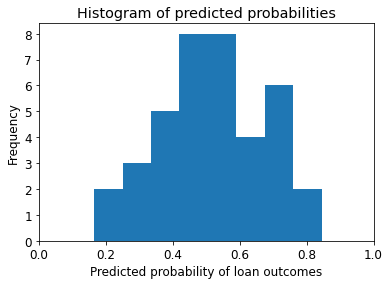

In [30]:
############## Frequency distribution of the predicted probabilities to check the confidence range of the predicted classes  ##########

y_pred_prob = rfc.predict_proba(X_test)[:, 1]

%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12
# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of loan outcomes')
plt.ylabel('Frequency')

y_pred_prob  [0.34282803 0.58982144 0.58716231 0.43319886 0.6014222  0.54896031
 0.69535526 0.61026331 0.47169064 0.43840511 0.36171806 0.72498033
 0.69652993 0.16518303 0.59461485 0.39372127 0.57235886 0.56825378
 0.34282803 0.75845079 0.52998692 0.63425798 0.56559083 0.29592856
 0.46488146 0.48991293 0.8449053  0.39429147 0.30370277 0.20232589
 0.75277778 0.71770545 0.7620623  0.31699856 0.5204766  0.46311295
 0.45128747 0.49823023]
y_test_new  [0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0
 1]


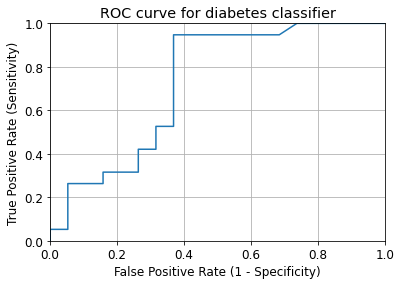

In [34]:
################## ROC curve ##################

# we do not use y_pred_class, because it will give incorrect results without generating an error
# fpr: false positive rate
# tpr: true positive rate

# defaulted -- class 0
# repaid -- class 1


# print ("c", y_pred_prob[0:10])

y_test_array = np.array(y_test['loan_outcome'])
y_test_new = []
for e_ in y_test_array: 
    if e_ == "defaulted":
        y_test_new.append(0)
    else:
        y_test_new.append(1)
    
y_test_new = np.array(y_test_new)
print ("y_pred_prob ", y_pred_prob)
print ("y_test_new ", y_test_new)
fpr, tpr, thresholds = metrics.roc_curve(y_test_new, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [35]:
##### Accuracy score #######
print(metrics.roc_auc_score(y_test, y_pred_prob))


0.7271468144044322


In [20]:
##### Confusion matrix #######

from sklearn import metrics

print(metrics.confusion_matrix(y_test, rfc_predict))


[[12  7]
 [ 6 13]]


In [11]:
###################. SVM ###############

from sklearn.svm import SVC
clf_3 = SVC( gamma=10, C=0.5, 
            class_weight='balanced', # penalize
            probability=True, cache_size=7000)

clf_3.fit(X_train, y_train)

/Users/shreyajain/anaconda3/envs/deep_learning/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=0.5, cache_size=7000, class_weight='balanced', gamma=10, probability=True)

In [12]:
clf_3_predict = clf_3.predict(X_test)

from sklearn.metrics import accuracy_score

print(classification_report(y_test, clf_3_predict))


acc = accuracy_score(y_test, clf_3_predict, normalize=True)
print ("Model accuracy % ", acc)

              precision    recall  f1-score   support

   defaulted       0.00      0.00      0.00        19
      repaid       0.50      1.00      0.67        19

    accuracy                           0.50        38
   macro avg       0.25      0.50      0.33        38
weighted avg       0.25      0.50      0.33        38

Model accuracy %  0.5


/Users/shreyajain/anaconda3/envs/deep_learning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
################# Naive Bayes #################

# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

most_altitude_encoded=le.fit_transform(input_df["most_altitude"])
most_location_provider_encoded=le.fit_transform(input_df["most_location_provider"])
most_long_1_encoded=le.fit_transform(input_df["most_long_1"])
most_lat_1_encoded=le.fit_transform(input_df["most_lat_1"])
y = le.fit_transform(input_df["loan_outcome"])

data = {'most_altitude_encoded':most_altitude_encoded,'most_location_provider_encoded':most_location_provider_encoded,
       'most_long_1_encoded': most_long_1_encoded, 'most_lat_1_encoded': most_lat_1_encoded, 'target': y}
X = pd.DataFrame(data)
X.head(10)

X = pd.concat([X, input_df[["Frequency_gps_points","age","cash_incoming_30days"]]], axis=1)
X.head(10)


y = X[['target']]
X = X.drop(columns=['target'])

print ("X ", X.shape)
print ("y ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gaussianNB = GaussianNB()

# Train the model using the training sets
gaussianNB.fit(X_train,y_train)

gaussianNB_predict = gaussianNB.predict(X_test)

from sklearn.metrics import accuracy_score

print(classification_report(y_test, gaussianNB_predict))


acc = accuracy_score(y_test, gaussianNB_predict, normalize=True)
print ("Model accuracy % ", acc)



X  (371, 7)
y  (371, 1)
              precision    recall  f1-score   support

           0       0.59      0.84      0.70        19
           1       0.73      0.42      0.53        19

    accuracy                           0.63        38
   macro avg       0.66      0.63      0.61        38
weighted avg       0.66      0.63      0.61        38

Model accuracy %  0.631578947368421


/Users/shreyajain/anaconda3/envs/deep_learning/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [15]:
############### Pickling and Saving the model ################
import pickle as p

filename = 'models/gaussianNB_model.pkl'
p.dump(gaussianNB, open(filename, 'wb'))
 
